In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")
sys.path.append("/home/ky2446/simclr/simclr/instance-discrim")
sys.path.append("/home/ky2446/simclr/simclr/dloader")

In [2]:
from simclr import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *
from ResNetCifar import ResNetCifar
from utilsInstance import *
from NCEAverage import *
from NCECriterion import *
from alias_multinomial import *
from Cifar10Instance import *
from downstreamnew import DownStreamNew


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pickle

In [4]:
shuffle = True
train_loader_ds, val_loader_ds = train_loader_dstream("CIFAR10",256,0.1,shuffle)

Files already downloaded and verified


In [5]:
model = SimClr('resnet50',128).cuda()
model.load_state_dict(torch.load("/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS-256-PD128-LARS"))

<All keys matched successfully>

In [6]:
model_ds = DownStreamNew(model.encoder,model.projector.layers[:2],2048,10).cuda()
optimizer = torch.optim.Adam(model_ds.parameters(), lr=3e-4)
criterion = torch.nn.CrossEntropyLoss()
epochs = 100
model_ds,train_loss_list,train_acc_list,val_loss_list,val_acc_list = train_ds(train_loader_ds, val_loader_ds, model_ds, criterion, optimizer,epochs,True,path="/home/ky2446/dstream-saved-models/CIFAR10-RES50-SIMCLR-BS-256-PD128-LARS")

Epoch: 0, step: 50/175, training_loss: 0.7559905648231506, training_acc: 0.7421875
Epoch: 0, step: 100/175, training_loss: 0.6966698169708252, training_acc: 0.76171875
Epoch: 0, step: 150/175, training_loss: 0.8294098973274231, training_acc: 0.69140625
Epoch: 0 completed, average train loss: 0.8344141622952053, average training_acc: 0.7217633928571429, average validation loss: 0.6876560731938011, average validation_acc: 0.7559621710526315 time taken: 0.41933450698852537 mins
Epoch: 1, step: 50/175, training_loss: 0.6381105184555054, training_acc: 0.7578125
Epoch: 1, step: 100/175, training_loss: 0.64664226770401, training_acc: 0.75390625
Epoch: 1, step: 150/175, training_loss: 0.6628273129463196, training_acc: 0.7421875
Epoch: 1 completed, average train loss: 0.6761347728116172, average training_acc: 0.7603571428571428, average validation loss: 0.6559316610035143, average validation_acc: 0.7693256578947368 time taken: 0.41356534560521446 mins
Epoch: 2, step: 50/175, training_loss: 0.71

Epoch: 17, step: 150/175, training_loss: 0.5336937308311462, training_acc: 0.796875
Epoch: 17 completed, average train loss: 0.5801781129837036, average training_acc: 0.7925669642857143, average validation loss: 0.5867376986302828, average validation_acc: 0.7882401315789473 time taken: 0.41580379009246826 mins
Epoch: 18, step: 50/175, training_loss: 0.6616334915161133, training_acc: 0.796875
Epoch: 18, step: 100/175, training_loss: 0.5503924489021301, training_acc: 0.79296875
Epoch: 18, step: 150/175, training_loss: 0.5134289264678955, training_acc: 0.8515625
Epoch: 18 completed, average train loss: 0.5767715942859649, average training_acc: 0.7941071428571429, average validation loss: 0.5855012990926441, average validation_acc: 0.7874177631578947 time taken: 0.4156306068102519 mins
Epoch: 19, step: 50/175, training_loss: 0.607394814491272, training_acc: 0.76171875
Epoch: 19, step: 100/175, training_loss: 0.5839806199073792, training_acc: 0.796875
Epoch: 19, step: 150/175, training_loss

Epoch: 34 completed, average train loss: 0.5491352355480195, average training_acc: 0.8028571428571428, average validation loss: 0.5637256158025641, average validation_acc: 0.7952302631578947 time taken: 0.41451632181803383 mins
Epoch: 35, step: 50/175, training_loss: 0.6178610920906067, training_acc: 0.78515625
Epoch: 35, step: 100/175, training_loss: 0.5771533250808716, training_acc: 0.78125
Epoch: 35, step: 150/175, training_loss: 0.5541105270385742, training_acc: 0.8203125
Epoch: 35 completed, average train loss: 0.5480536113466535, average training_acc: 0.8021651785714285, average validation loss: 0.5685204643952219, average validation_acc: 0.791735197368421 time taken: 0.4136592944463094 mins
Epoch: 36, step: 50/175, training_loss: 0.5778365731239319, training_acc: 0.80859375
Epoch: 36, step: 100/175, training_loss: 0.4956079423427582, training_acc: 0.8125
Epoch: 36, step: 150/175, training_loss: 0.6699974536895752, training_acc: 0.76953125
Epoch: 36 completed, average train loss:

Epoch: 52, step: 50/175, training_loss: 0.4984178841114044, training_acc: 0.8203125
Epoch: 52, step: 100/175, training_loss: 0.5514677166938782, training_acc: 0.796875
Epoch: 52, step: 150/175, training_loss: 0.638289749622345, training_acc: 0.74609375
Epoch: 52 completed, average train loss: 0.5295952219622476, average training_acc: 0.8097767857142857, average validation loss: 0.5537841978826021, average validation_acc: 0.798108552631579 time taken: 0.418858007589976 mins
Epoch: 53, step: 50/175, training_loss: 0.5127251744270325, training_acc: 0.81640625
Epoch: 53, step: 100/175, training_loss: 0.5430209040641785, training_acc: 0.78125
Epoch: 53, step: 150/175, training_loss: 0.5135362148284912, training_acc: 0.81640625
Epoch: 53 completed, average train loss: 0.5269632632391793, average training_acc: 0.8122544642857142, average validation loss: 0.5554802260900799, average validation_acc: 0.7997532894736842 time taken: 0.4183698336283366 mins
Epoch: 54, step: 50/175, training_loss: 0

Epoch: 69, step: 100/175, training_loss: 0.4769352674484253, training_acc: 0.8515625
Epoch: 69, step: 150/175, training_loss: 0.5677879452705383, training_acc: 0.78515625
Epoch: 69 completed, average train loss: 0.5143384550298963, average training_acc: 0.8150669642857142, average validation loss: 0.5500076993515617, average validation_acc: 0.7991365131578947 time taken: 0.4155335744222005 mins
Epoch: 70, step: 50/175, training_loss: 0.5135881900787354, training_acc: 0.80859375
Epoch: 70, step: 100/175, training_loss: 0.5021233558654785, training_acc: 0.79296875
Epoch: 70, step: 150/175, training_loss: 0.5100345015525818, training_acc: 0.83984375
Epoch: 70 completed, average train loss: 0.5147729395117079, average training_acc: 0.8137276785714286, average validation loss: 0.5577249668146435, average validation_acc: 0.7950246710526315 time taken: 0.414661435286204 mins
Epoch: 71, step: 50/175, training_loss: 0.4696648120880127, training_acc: 0.8203125
Epoch: 71, step: 100/175, training_

Epoch: 86, step: 150/175, training_loss: 0.46269628405570984, training_acc: 0.82421875
Epoch: 86 completed, average train loss: 0.5051507558141436, average training_acc: 0.8175, average validation loss: 0.5474956396378969, average validation_acc: 0.8013980263157895 time taken: 0.4151388804117839 mins
Epoch: 87, step: 50/175, training_loss: 0.5385732054710388, training_acc: 0.82421875
Epoch: 87, step: 100/175, training_loss: 0.45091235637664795, training_acc: 0.80078125
Epoch: 87, step: 150/175, training_loss: 0.46709710359573364, training_acc: 0.8046875
Epoch: 87 completed, average train loss: 0.5036166162150246, average training_acc: 0.8183258928571429, average validation loss: 0.555005321377202, average validation_acc: 0.7987253289473685 time taken: 0.4136925299962362 mins
Epoch: 88, step: 50/175, training_loss: 0.494162917137146, training_acc: 0.796875
Epoch: 88, step: 100/175, training_loss: 0.5173759460449219, training_acc: 0.80859375
Epoch: 88, step: 150/175, training_loss: 0.486

[]

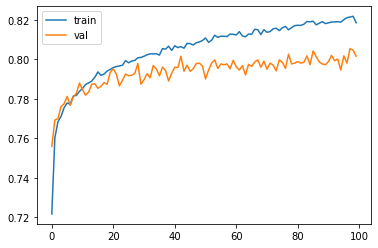

In [7]:
import matplotlib.pyplot as plt
plt.plot(train_acc_list,label="train")
plt.plot(val_acc_list,label="val")
plt.legend()

plt.plot()

In [8]:
with open("/home/ky2446/dstream-trainloss-logs/CIFAR10-RES50-DSTREAM-BS-256-PD128-LARS", "wb") as fp:   #Pickling
    pickle.dump(train_loss_list, fp)
with open("/home/ky2446/dstream-trainacc-logs/CIFAR10-RES50-DSTREAM-BS-256-PD128-LARS", "wb") as fp:   #Pickling
    pickle.dump(train_acc_list, fp)
with open("/home/ky2446/dstream-valloss-logs/CIFAR10-RES50-DSTREAM-BS-256-PD128-LARS", "wb") as fp:   #Pickling
    pickle.dump(val_loss_list, fp)
with open("/home/ky2446/dstream-valacc-logs/CIFAR10-RES50-DSTREAM-BS-256-PD128-LARS", "wb") as fp:   #Pickling
    pickle.dump(val_acc_list, fp)